In [1]:
import cv2
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np 
import math

(400, 500)


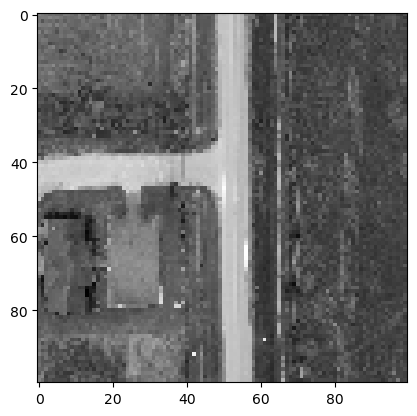

(<matplotlib.image.AxesImage at 0x7ff64c9cbf90>, None)

In [180]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt
MIN_MATCH_COUNT = 5
img1 = cv.imread('results/drone0012-key/00036.png', cv.IMREAD_GRAYSCALE)          # queryImage
img2 = cv.imread('tiles-20-03/Tiles/1.png', cv.IMREAD_GRAYSCALE) # trainImage
# img2 = cv.rotate(img2, cv2.ROTATE_90_CLOCKWISE)
templ = img1[100:500, 300:800]
print(templ.shape)
templ = cv2.resize(templ, (100, 100))
plt.imshow(templ, 'gray'),plt.show()

In [177]:
match_method = 0
max_Trackbar = 5

def MatchingMethod(param):
    global match_method
    match_method = param
    
    img_display = img.copy()
    
    method_accepts_mask = (cv.TM_SQDIFF == match_method or match_method == cv.TM_CCORR_NORMED)
    if (use_mask and method_accepts_mask):
        result = cv.matchTemplate(img, templ, match_method, None, mask)
    else:
        result = cv.matchTemplate(img, templ, match_method)
    
    
    cv.normalize( result, result, 0, 1, cv.NORM_MINMAX, -1 )
    
    _minVal, _maxVal, minLoc, maxLoc = cv.minMaxLoc(result, None)
    
    
    if (match_method == cv.TM_SQDIFF or match_method == cv.TM_SQDIFF_NORMED):
        matchLoc = minLoc
    else:
        matchLoc = maxLoc
    
    
    cv.rectangle(img_display, matchLoc, (matchLoc[0] + templ.shape[0], matchLoc[1] + templ.shape[1]), (0,0,0), 2, 8, 0 )
    cv.rectangle(result, matchLoc, (matchLoc[0] + templ.shape[0], matchLoc[1] + templ.shape[1]), (0,0,0), 2, 8, 0 )
#     cv.imshow(image_window, img_display)
#     cv.imshow(result_window, result)
    
    return matchLoc, img_display, result


In [178]:
img = cv.imread('tiles-20-03/Tiles/1.png', cv.IMREAD_COLOR)
global use_mask
use_mask = False
trackbar_label = 'Method: \n 0: SQDIFF \n 1: SQDIFF NORMED \n 2: TM CCORR \n 3: TM CCORR NORMED \n 4: TM COEFF \n 5: TM COEFF NORMED'
# cv.createTrackbar( trackbar_label, image_window, match_method/, max_Trackbar, MatchingMethod )

matchLoc, img_display, result = MatchingMethod(match_method)

error: OpenCV(4.7.0) /io/opencv/modules/imgproc/src/templmatch.cpp:1164: error: (-215:Assertion failed) (depth == CV_8U || depth == CV_32F) && type == _templ.type() && _img.dims() <= 2 in function 'matchTemplate'


In [ ]:
# find the keypoints and descriptors with SIFT
kp1, des1 = sift.detectAndCompute(img1,None)
kp2, des2 = sift.detectAndCompute(img2,None)
FLANN_INDEX_KDTREE = 1
index_params = dict(algorithm = FLANN_INDEX_KDTREE, trees = 5)
search_params = dict(checks = 50)
flann = cv.FlannBasedMatcher(index_params, search_params)
matches = flann.knnMatch(des1,des2,k=2)
# store all the good matches as per Lowe's ratio test.
good = []
for m,n in matches:
    if m.distance < 0.7*n.distance:
        good.append(m)

In [137]:
if len(good)>MIN_MATCH_COUNT:
    src_pts = np.float32([ kp1[m.queryIdx].pt for m in good ]).reshape(-1,1,2)
    dst_pts = np.float32([ kp2[m.trainIdx].pt for m in good ]).reshape(-1,1,2)
    M, mask = cv.findHomography(src_pts, dst_pts, cv.RANSAC,5.0)
    matchesMask = mask.ravel().tolist()
    h,w = img1.shape
    pts = np.float32([ [0,0],[0,h-1],[w-1,h-1],[w-1,0] ]).reshape(-1,1,2)
    dst = cv.perspectiveTransform(pts,M)
    img2 = cv.polylines(img2,[np.int32(dst)],True,255,3, cv.LINE_AA)
    draw_params = dict(matchColor = (0,255,0), # draw matches in green color
                   singlePointColor = None,
                   matchesMask = matchesMask, # draw only inliers
                   flags = 2)
    img3 = cv.drawMatches(img1,kp1,img2,kp2,good,None,**draw_params)
else:
    print( "Not enough matches are found - {}/{}".format(len(good), MIN_MATCH_COUNT) )
    matchesMask = None
    img3 = None


Not enough matches are found - 2/5


TypeError: Image data of dtype object cannot be converted to float

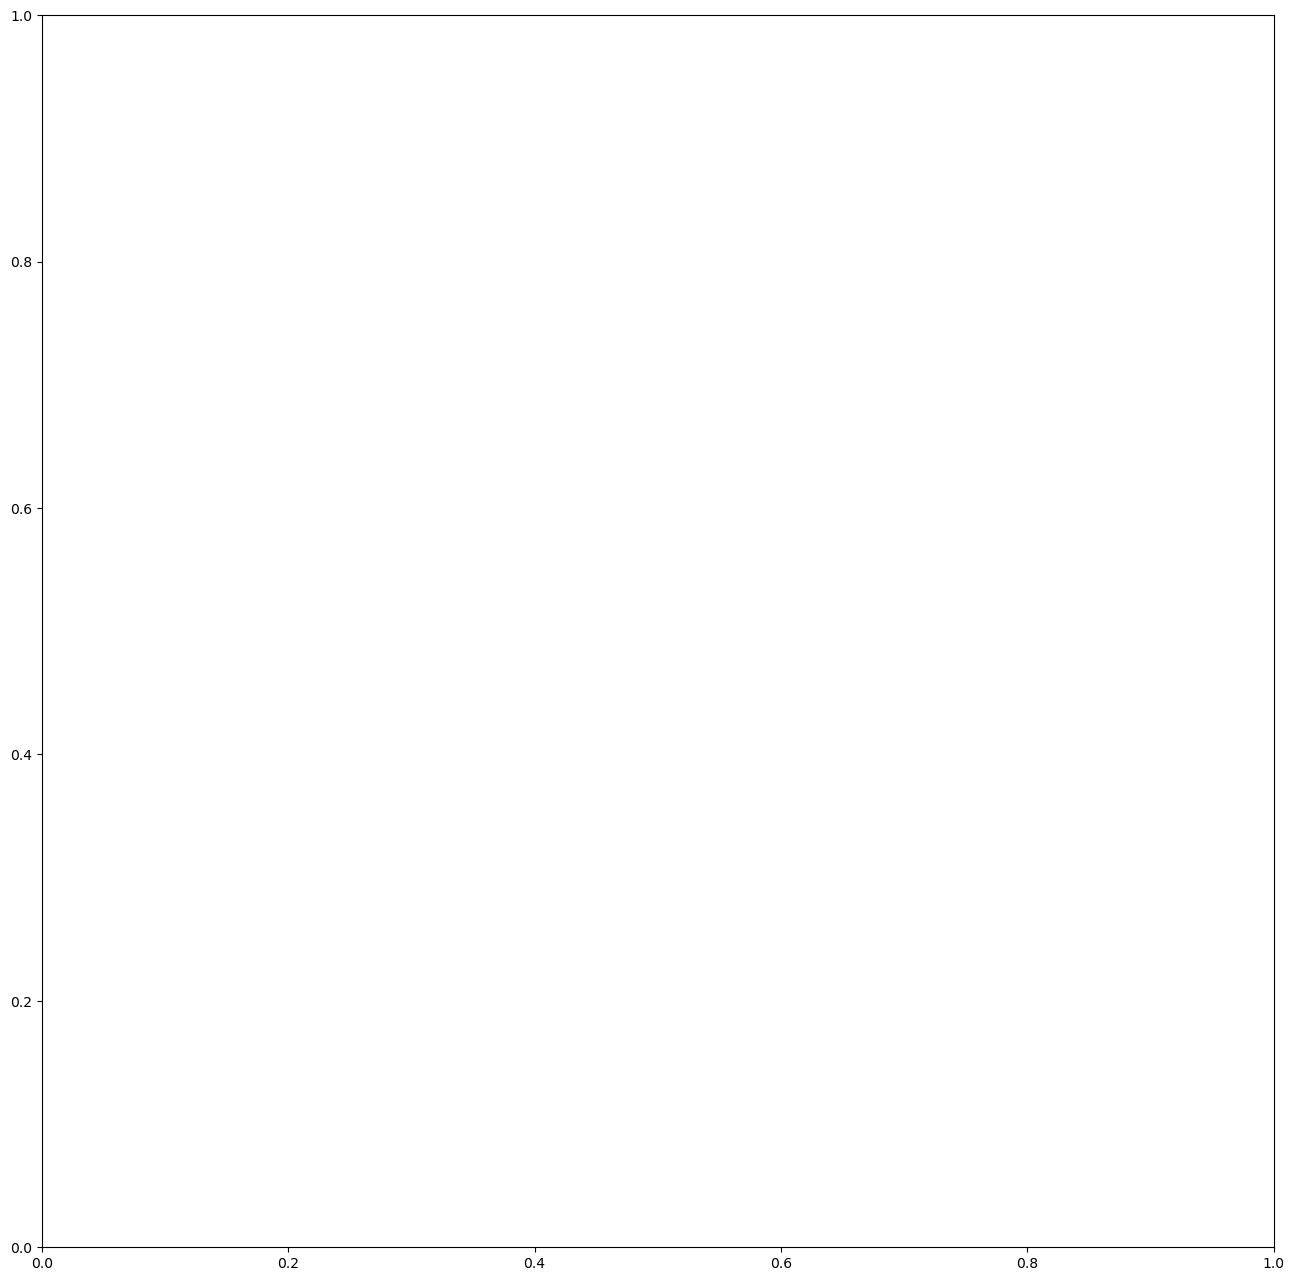

In [136]:
plt.figure(figsize=(16,16))
plt.imshow(img3, 'gray'),plt.show()

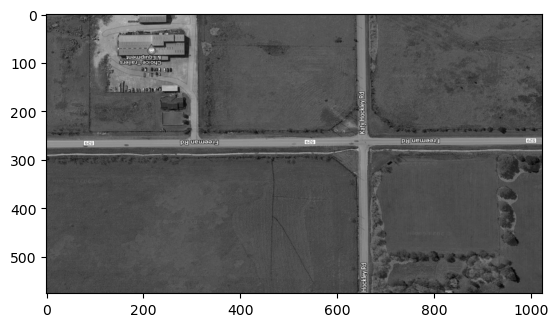

(<matplotlib.image.AxesImage at 0x7ff67c617b50>, None)

In [87]:
plt.imshow(img2, 'gray'),plt.show()